In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## **Visualization**
With **PCA**

In [2]:
np.random.seed(0)
mean = np.array([0.0, 0.0])
cov = np.array([[1.0, -1.0],
                [-2.0, 3.0]])

X = np.random.multivariate_normal(mean, cov, 300)

pca = PCA()
pca.fit(X)

<ipython-input-2-0dc6cf326656>:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)


PCA()

In [3]:
# variance ratio explained by each component
tuple(pca.explained_variance_ratio_)

(0.9390505691150487, 0.060949430884951215)

In [4]:
# Directions of Principal Components
print(pca.components_[0])
print(pca.components_[1])

[-0.57532172  0.81792721]
[-0.81792721 -0.57532172]


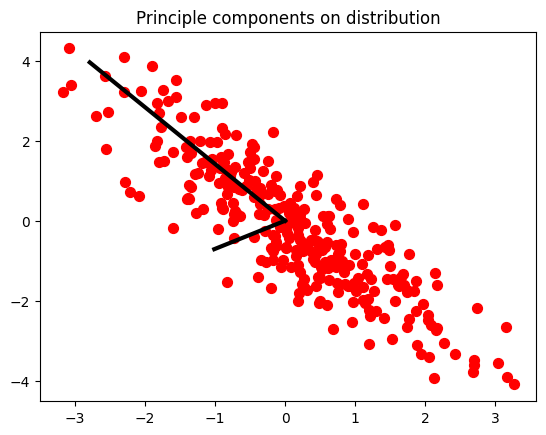

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=50, c="r")
for l, v in zip(pca.explained_variance_ratio_, pca.components_):
    d = 5 * np.sqrt(l) * v
    plt.plot([0, d[0]], [0, d[1]], '-k', lw=3)

plt.title("Principle components on distribution")
plt.show();

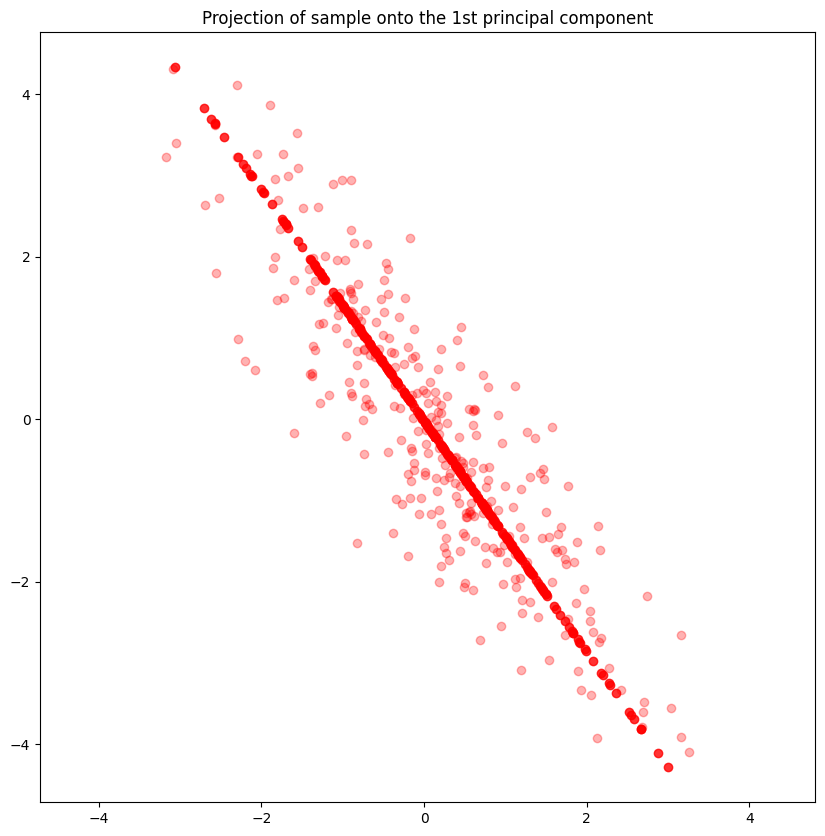

In [6]:
# Keep enough components to explain 90% of variance
pca = PCA(0.90)
X_reduced = pca.fit_transform(X)

# Map the reduced data into the initial feature space
X_new = pca.inverse_transform(X_reduced)

plt.figure(figsize=(10,10))
plt.plot(X[:, 0], X[:, 1], 'or', alpha=0.3)
plt.plot(X_new[:, 0], X_new[:, 1], 'or', alpha=0.8)
plt.axis('equal')
plt.title('Projection of sample onto the 1st principal component')
plt.show()

In [7]:
from sklearn import datasets

In [8]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [9]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [10]:
for component in pca.components_:
  print(" + ".join("%.3f x %s" % (value, name)
  for value, name in zip(component, iris.feature_names)))

0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


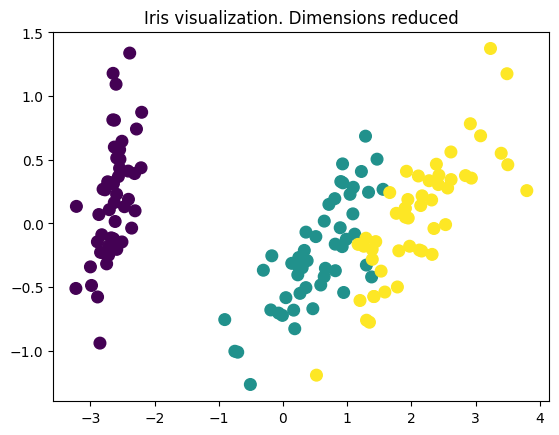

In [11]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=70, cmap="viridis")
plt.title("Iris visualization. Dimensions reduced")
plt.show();

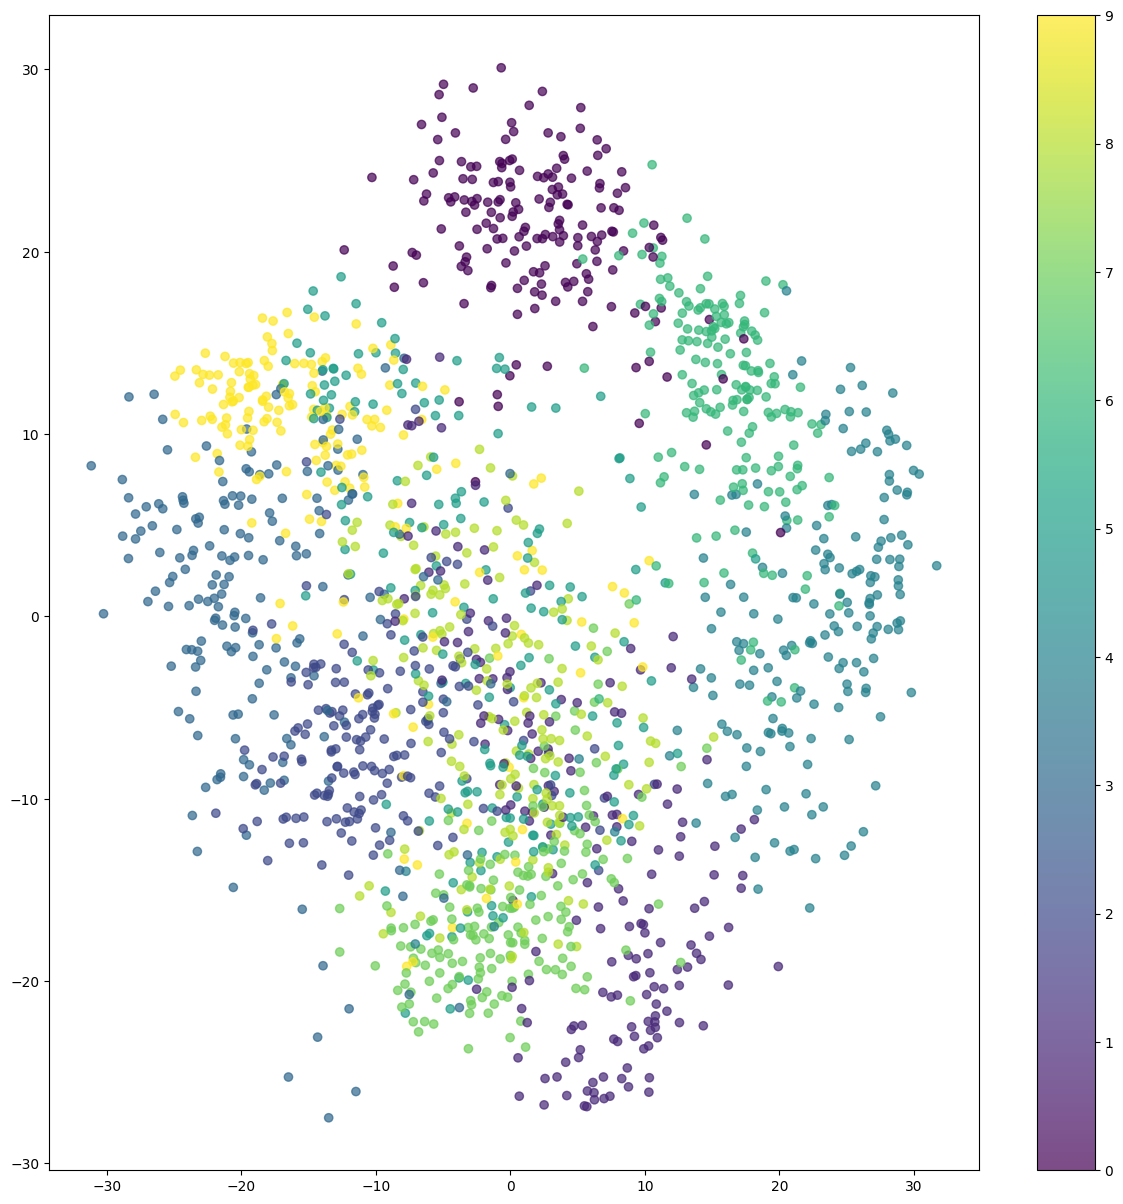

In [12]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.figure(figsize=(15, 15))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, alpha=0.7)
plt.colorbar()
plt.show();

We definitely see some clusters here for 0s, and other digits

In general we choose number of components such that 90% of variance are preserved

**We can also visualize principal components**

In [16]:
pca.components_.shape

(2, 64)

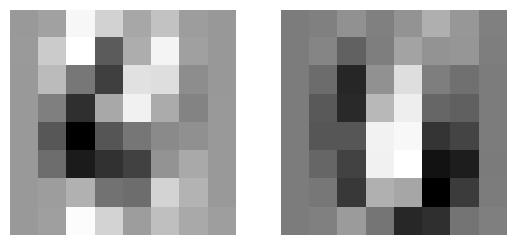

In [23]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.imshow(pca.components_[0].reshape(8, 8), cmap="binary");
ax1.set_axis_off()
ax2.set_axis_off()
ax2.imshow(pca.components_[1].reshape(8, 8), cmap="binary");

# That's all folks!

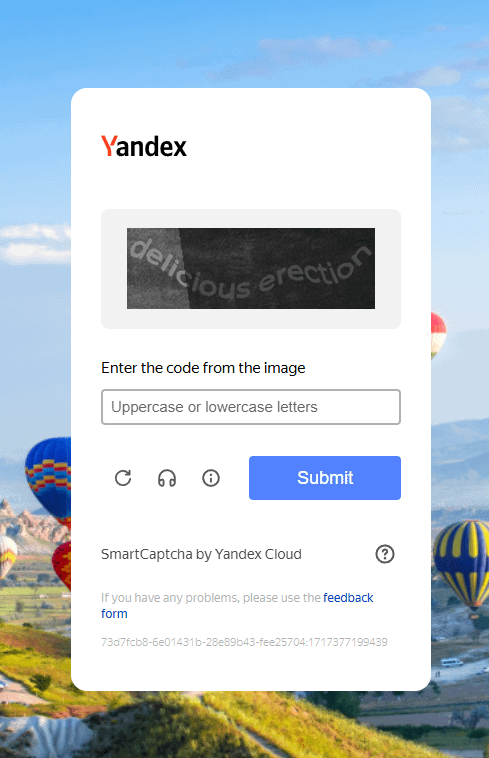